# Import Required Libraries

Install and import all the relevant libraries for the research.

In [1]:
%pip install shap

import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, ConfusionMatrixDisplay
import shap

import warnings
warnings.filterwarnings('ignore')

import pickle

Note: you may need to restart the kernel to use updated packages.


In [2]:
from analyse_src.basic_data_inspection import (DataInspector, 
                                               DataShapeInspectionStrategy, 
                                               DataInfoInspectionStrategy, 
                                               DataUniqueInspectionStrategy,
                                               )
from analyse_src.missing_values_analysis import MissingValuesAnalysis
from analyse_src.data_imbalance_analysis import DataImbalanceAnalysis

# Load the Dataset

In [3]:
# Define the path to the dataset
data_path = "../data/ethereum_fraud_labeled_data.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(data_path)

df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


# Exploratory Data Analysis

## Data Shape

In [4]:
# Get shape of the dataset

data_inspector = DataInspector(DataShapeInspectionStrategy())
data_inspector.execute_strategy(df)

(9841, 51)


## Feature Info

In [5]:
# Switch strategy to get feature information

data_inspector.set_strategy(DataInfoInspectionStrategy())
data_inspector.execute_strategy(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

## Uniques values in features

In [6]:
# Switch strategy to get unique values in features

data_inspector.set_strategy(DataUniqueInspectionStrategy())
data_inspector.execute_strategy(df)

Unnamed: 0 : 9841
Index : 4729
Address : 9816
FLAG : 2
Avg min between sent tnx : 5013
Avg min between received tnx : 6223
Time Diff between first and last (Mins) : 7810
Sent tnx : 641
Received Tnx : 727
Number of Created Contracts : 20
Unique Received From Addresses : 256
Unique Sent To Addresses : 258
min value received : 4589
max value received  : 6302
avg val received : 6767
min val sent : 4719
max val sent : 6647
avg val sent : 5854
min value sent to contract : 3
max val sent to contract : 4
avg value sent to contract : 4
total transactions (including tnx to create contract : 897
total Ether sent : 5868
total ether received : 6728
total ether sent contracts : 4
total ether balance : 5717
 Total ERC20 tnxs : 301
 ERC20 total Ether received : 3461
 ERC20 total ether sent : 1416
 ERC20 total Ether sent contract : 30
 ERC20 uniq sent addr : 108
 ERC20 uniq rec addr : 148
 ERC20 uniq sent addr.1 : 5
 ERC20 uniq rec contract addr : 124
 ERC20 avg time between sent tnx : 2
 ERC20 avg tim

## Missing Values Analysis


Missing Values Count by Column:
 Total ERC20 tnxs                        829
 ERC20 total Ether received              829
 ERC20 total ether sent                  829
 ERC20 total Ether sent contract         829
 ERC20 uniq sent addr                    829
 ERC20 uniq rec addr                     829
 ERC20 uniq sent addr.1                  829
 ERC20 uniq rec contract addr            829
 ERC20 avg time between sent tnx         829
 ERC20 avg time between rec tnx          829
 ERC20 avg time between rec 2 tnx        829
 ERC20 avg time between contract tnx     829
 ERC20 min val rec                       829
 ERC20 max val rec                       829
 ERC20 avg val rec                       829
 ERC20 min val sent                      829
 ERC20 max val sent                      829
 ERC20 avg val sent                      829
 ERC20 min val sent contract             829
 ERC20 max val sent contract             829
 ERC20 avg val sent contract             829
 ERC20 uniq sent token

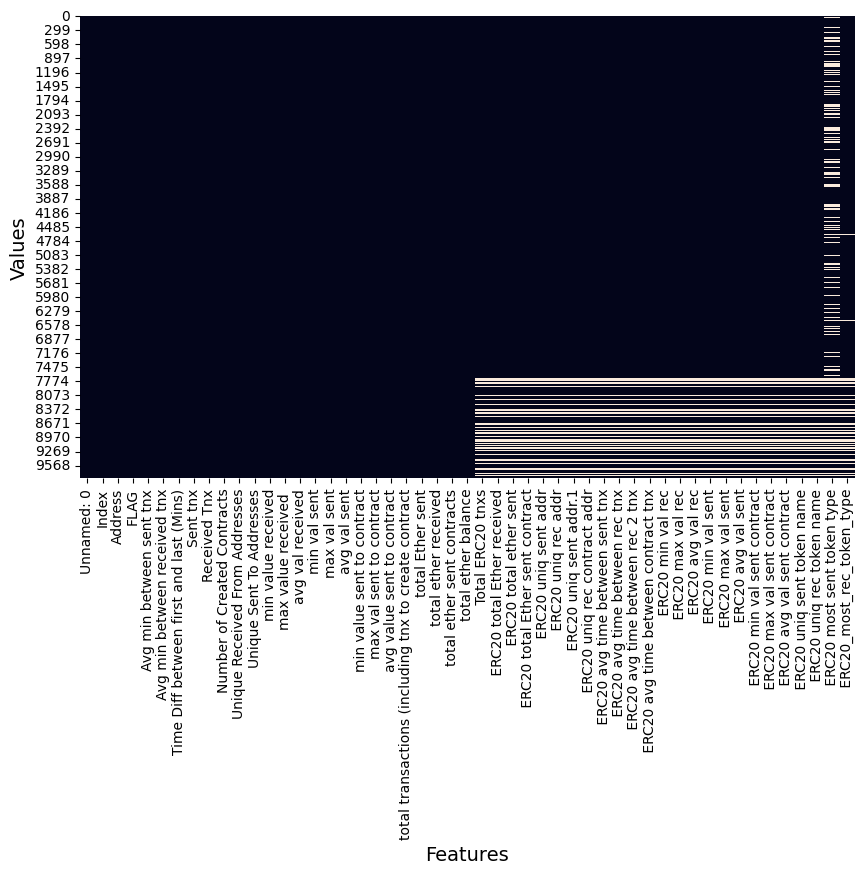

In [7]:
# Step 2: Missing Values analysis
missing_values_analyzer = MissingValuesAnalysis()
missing_values_analyzer.analyse(df)

## Data Imbalance Analysis

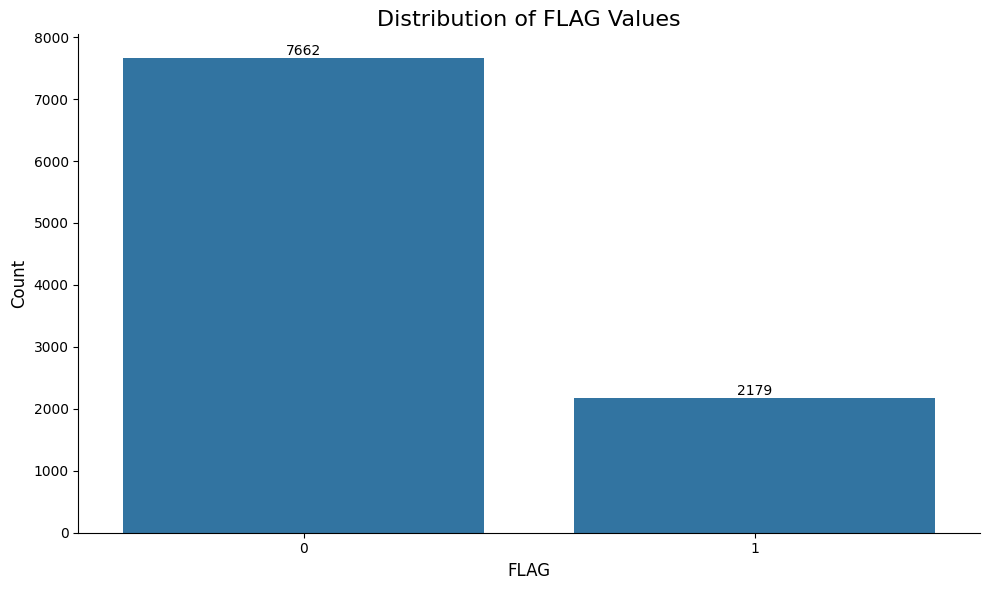

In [8]:
# Implement the imbalance analyzing class
data_imbalance_analyzer = DataImbalanceAnalysis()
data_imbalance_analyzer.visualize_data_imbalance(df)

## Insights

### 1. Shape of Data:
- The dataset consists of `9841` transactional entries with `51` distinct features.

### 2. Feature Information:
- There are `39` features of `float64` datatype, `9` features of `int` datatype, and `3` features of `object` datatype.
- No consistent naming scheme in the columns.

### 3. Unique Values:
- Multiple features have `less than 5 unique values`.

### 4. Missing Values:
- `ERC20` marked features have `829` missing values.
- `ERC20 most sent token type` has `2697` missing values.

### 5. Data Imbalance:
- Dataset has `7662` Non-Fraud labelled transactions and `2179` Fraud labelled transactions.

## Issues to address

- Categorical features would be removed from the dataset.
- Singular consistency would be applied to feature names.
- Features with less than 5 unique values would be carefully inspected in order to find and remove the ones which contribute very little to the models prediction.
- Entries with missing values can simply be reduced from the dataset.
- `ERC20 most sent token type` feature would be removed from the dataset.
- The dataset is highly imbalanced hence the Non-Fraud labelled transactions would be reduced to maintain the balance in the two classes.

- Certain features would be feature engineered.
- Some features might be highly correlated and would be addressed in the next phase.

# Data Cleaning

In [9]:
import sys
import os

# Add the 'src' directory to the Python path
sys.path.append(os.path.abspath("../src"))

from feature_cleaning import (
    FeatureCleaning,
    CategoricalFeatureCleaningStrategy,
    NoUniqueFeatureCleaningStrategy,
    RenameFeatureCleaningStrategy,
    UnwantedFeatureCleaningStrategy,
    CorrelatedFeatureCleaningStrategy,
    ImbalanceFeatureCleaningStrategy
)

from missing_value_handling import DropMissingValuesStrategy, MissingValueHandler

## Handling Missing Values

In [10]:
df.shape

(9841, 51)

In [11]:
missing_values_handler = MissingValueHandler(DropMissingValuesStrategy())
df = missing_values_handler.apply_strategy(df)
df.shape

(7121, 51)

## Remove unnecessary columns

***Unnamed: 0*** and ***Index*** are redundant, let's simply remove it.

In [12]:
# feature_cleaning = FeatureCleaning(
#         UnwantedFeatureCleaningStrategy(feature_list=["Unnamed: 0", "Index"])
#     )
# feature_cleaning.apply_strategy(df)
feature_cleaning = FeatureCleaning(UnwantedFeatureCleaningStrategy(feature_list=['Unnamed: 0', 'Index']))
df = feature_cleaning.apply_strategy(df)
df.shape


(7121, 49)

## Drop Categorical features.

In [13]:
feature_cleaning.set_strategy(CategoricalFeatureCleaningStrategy ())
df = feature_cleaning.apply_strategy(df)
df.shape

(7121, 46)

## Remove 0 features

The features with less distinct values won't help this research in building a model which detects fraud in a transaction. Hence, features with less than 5 distinct values would be identified and removed.

In [14]:
feature_cleaning.set_strategy(NoUniqueFeatureCleaningStrategy())
df = feature_cleaning.apply_strategy(df)
df.shape

(7121, 34)

## Handling Correlation in features.

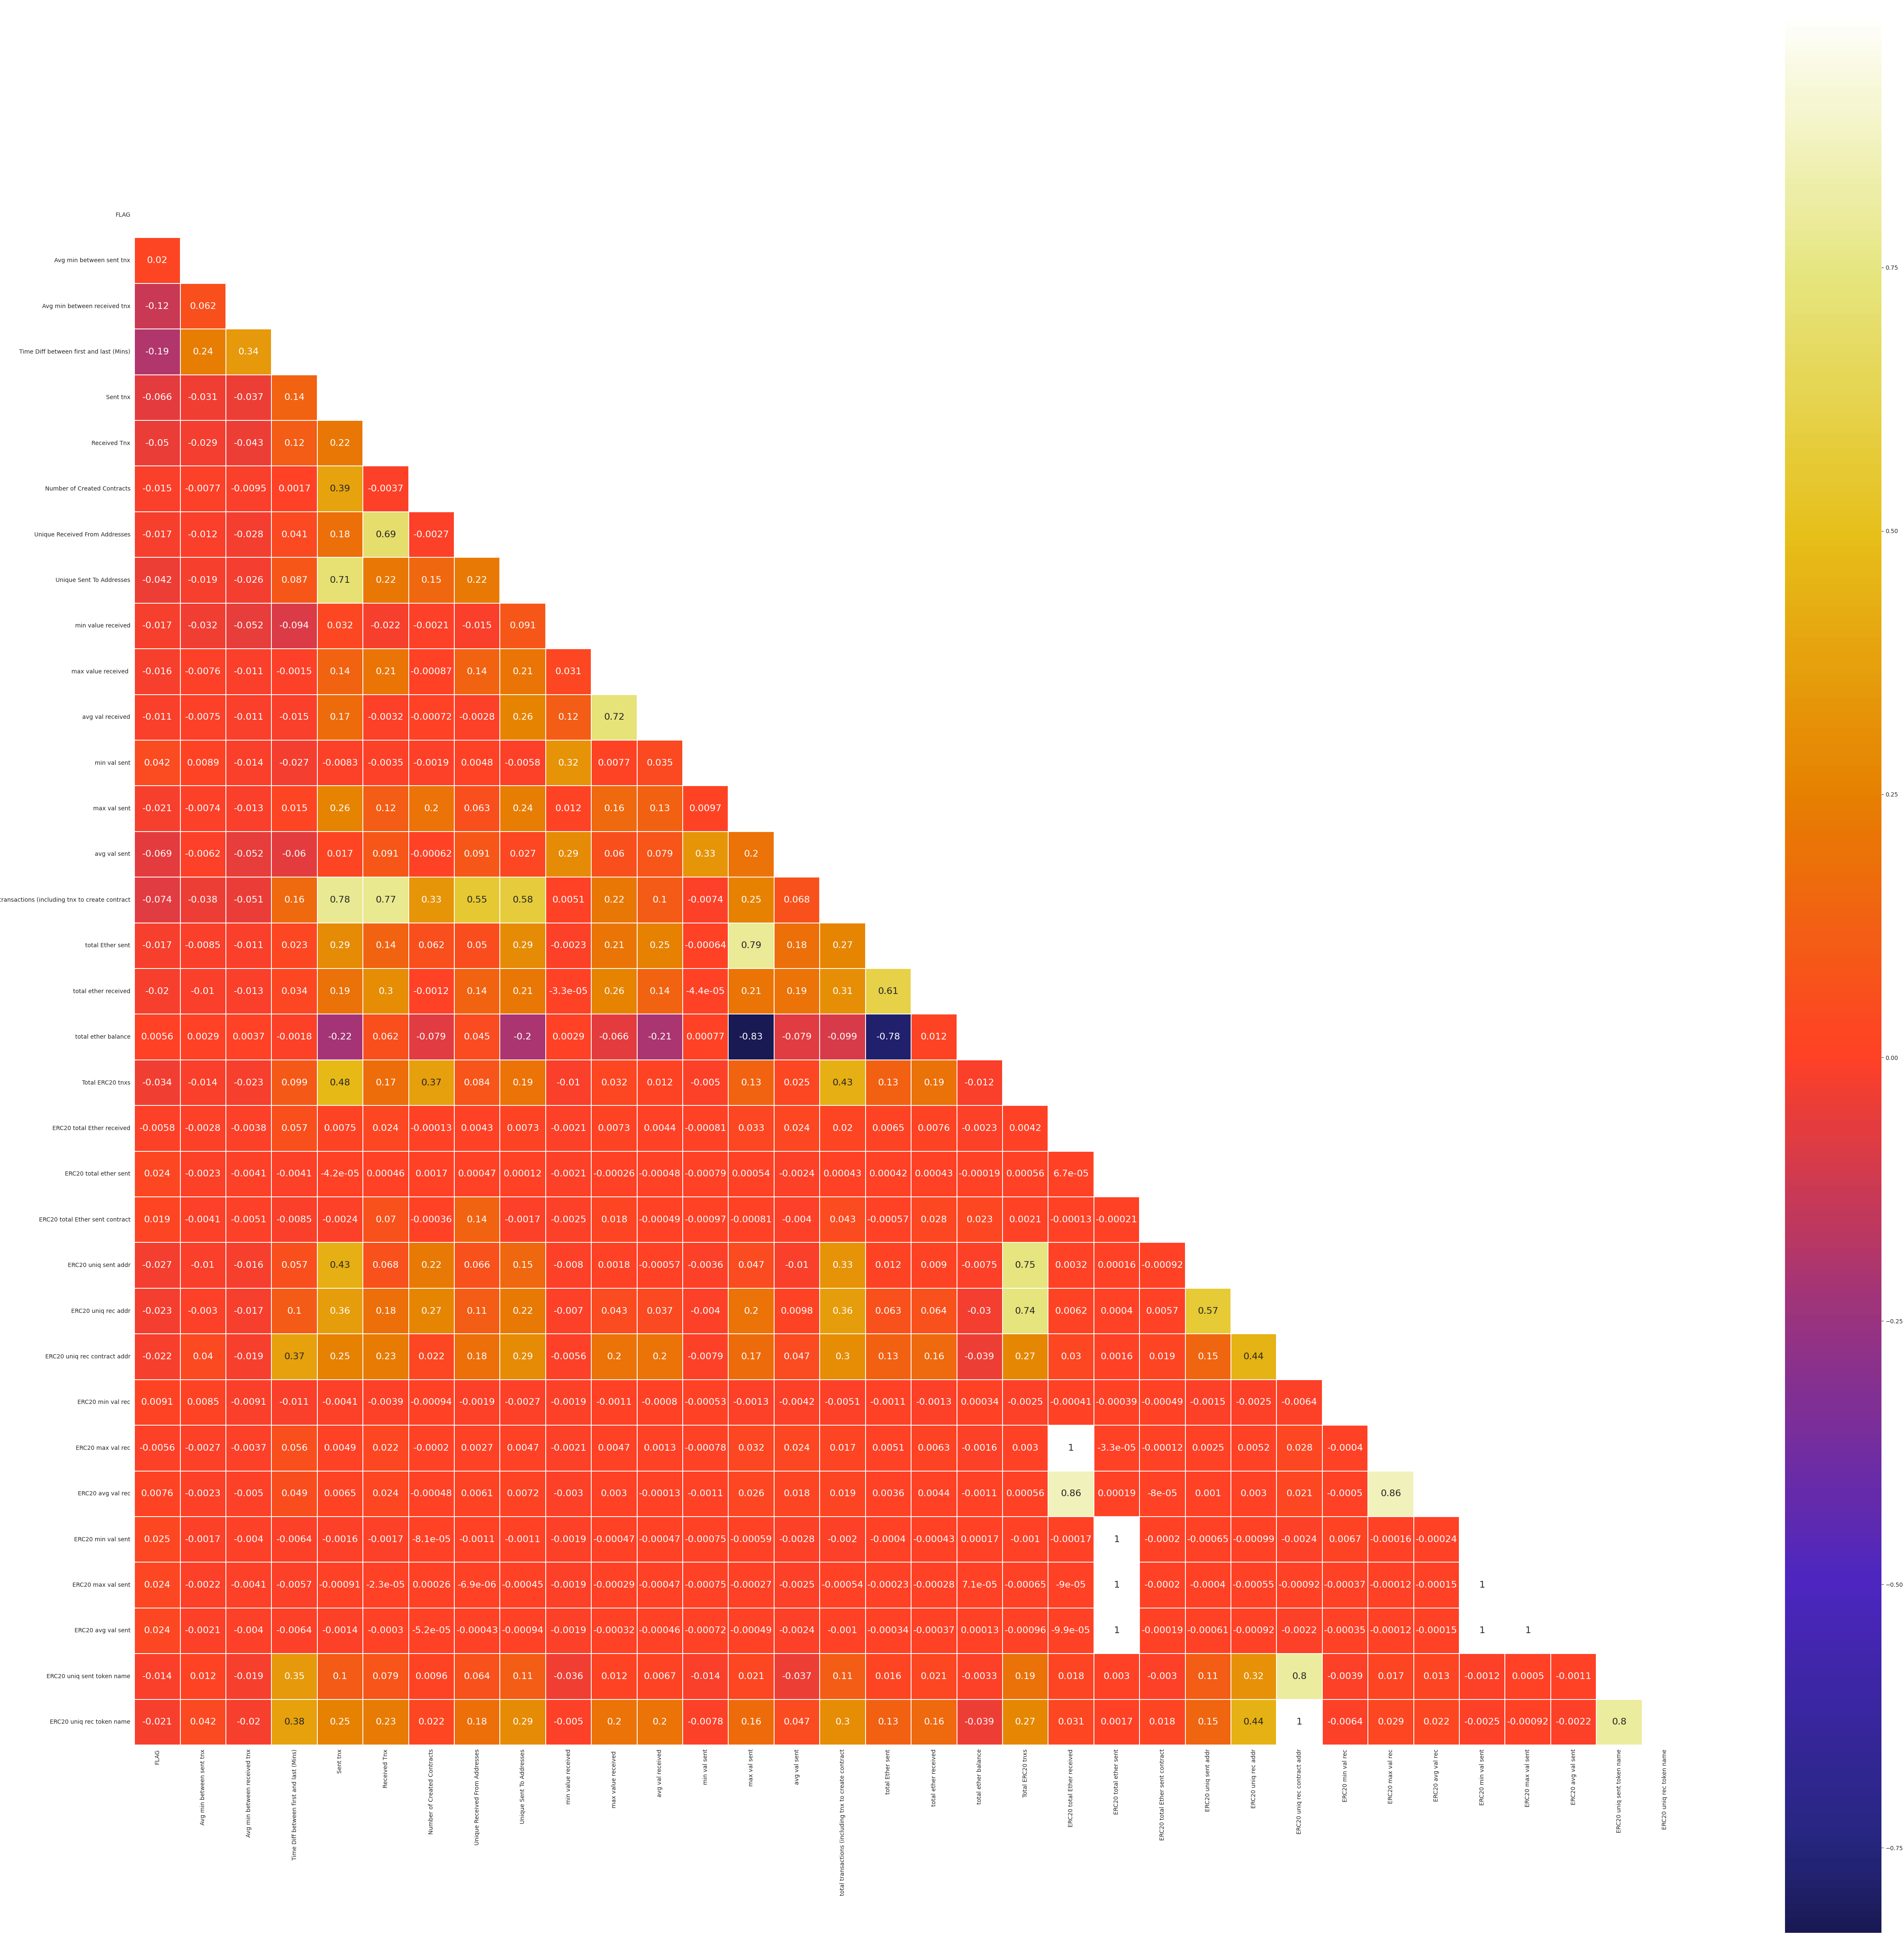

In [15]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(60,60))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True,annot_kws={"size": 16})

It can be observed that some features in the current dataset is highly correlated. These features would equally contribute in the development of the model hence such duplicate features can be removed from the dataset in order to reduce the dimension of the dataset.

In [16]:
feature_cleaning.set_strategy(CorrelatedFeatureCleaningStrategy())
df = feature_cleaning.apply_strategy(df)
df.shape

(7121, 29)

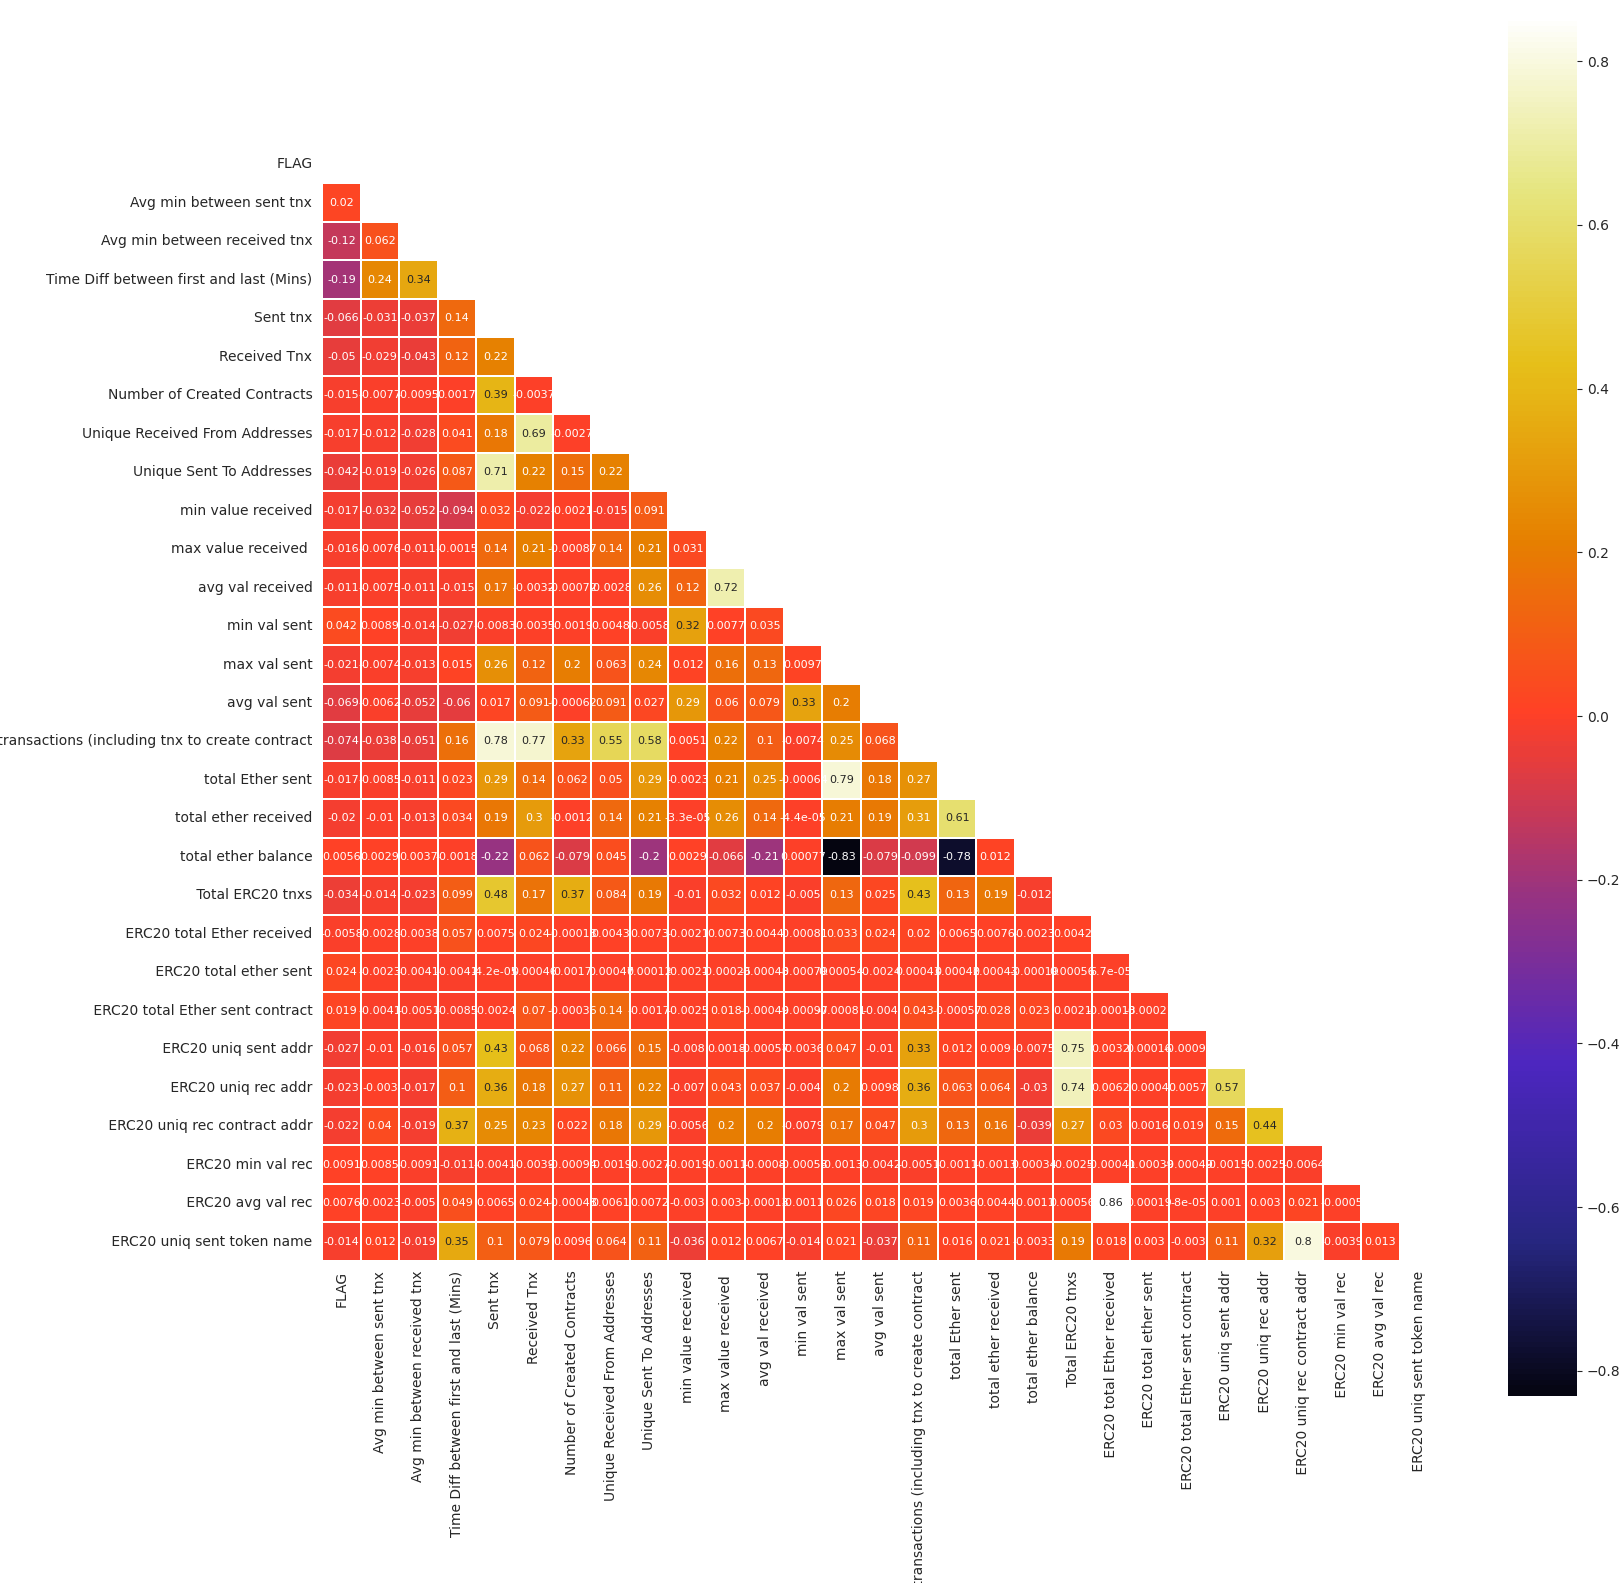

In [17]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,18))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True,annot_kws={"size": 8})

## Rename Features

Renaming features would make further processing easy and structure.

In [18]:
feature_cleaning.set_strategy(RenameFeatureCleaningStrategy())
df = feature_cleaning.apply_strategy(df)
df.columns

Index(['flag', 'avg_min_between_sent_tnx', 'avg_min_between_received_tnx',
       'time_diff_between_first_and_last_(mins)', 'sent_tnx', 'received_tnx',
       'number_of_created_contracts', 'unique_received_from_addresses',
       'unique_sent_to_addresses', 'min_value_received', 'max_value_received',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'total_transactions_(including_tnx_to_create_contract',
       'total_ether_sent', 'total_ether_received', 'total_ether_balance',
       'total_erc20_tnxs', 'erc20_total_ether_received',
       'erc20_total_ether_sent', 'erc20_total_ether_sent_contract',
       'erc20_uniq_sent_addr', 'erc20_uniq_rec_addr',
       'erc20_uniq_rec_contract_addr', 'erc20_min_val_rec',
       'erc20_avg_val_rec', 'erc20_uniq_sent_token_name'],
      dtype='object')

## Data Balancing

In [19]:
df['flag'].value_counts()

flag
0    5771
1    1350
Name: count, dtype: int64

In [20]:
feature_cleaning.set_strategy(ImbalanceFeatureCleaningStrategy(target_column='flag'))
df = feature_cleaning.apply_strategy(df)
df['flag'].value_counts(), df.shape

(flag
 0    1350
 1    1350
 Name: count, dtype: int64,
 (2700, 29))

## Save the cleaned Dataset

Creating a copy of the cleaned datset is always a wise practise to perform.

In [21]:
cleaned_df = df.copy()

# Data Pre-Processing

## Train Test Split

In [22]:
from data_splitting import DataSplitter, SimpleTrainTestSplitStrategy

data_splitter = DataSplitter(SimpleTrainTestSplitStrategy())
X_train, X_test, y_train, y_test = data_splitter.split(df=cleaned_df, target_column='flag')
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1890, 28), (810, 28), (1890,), (810,))

In [23]:
result_map = X_test.head(2).to_dict(orient='list')
result_map

{'avg_min_between_sent_tnx': [9571.62, 41.49],
 'avg_min_between_received_tnx': [92.65, 3394.1],
 'time_diff_between_first_and_last_(mins)': [69410.25, 1284742.27],
 'sent_tnx': [7, 370],
 'received_tnx': [26, 374],
 'number_of_created_contracts': [0, 0],
 'unique_received_from_addresses': [24, 4],
 'unique_sent_to_addresses': [4, 3],
 'min_value_received': [0.001312, 0.044836],
 'max_value_received': [4.9, 5.984678],
 'avg_val_received': [1.063073, 0.892415],
 'min_val_sent': [0.5, 0.042653],
 'max_val_sent': [12.003871, 5.981358999999999],
 'avg_val_sent': [4.02341, 0.8993559999999999],
 'total_transactions_(including_tnx_to_create_contract': [33, 744],
 'total_ether_sent': [28.16387078, 332.7618308000001],
 'total_ether_received': [27.63989778, 333.7633261000001],
 'total_ether_balance': [-0.5239729999999999, 1.00149532],
 'total_erc20_tnxs': [2.0, 0.0],
 'erc20_total_ether_received': [8.099999999999999e-11, 0.0],
 'erc20_total_ether_sent': [0.0, 0.0],
 'erc20_total_ether_sent_contr

## Normalizing Dataset

In [ ]:
from feature_engineering import FeatureEngineeringHandler, NormalizeFeatureEngineeringStrategy


feature_engineering_handler = FeatureEngineeringHandler(
    NormalizeFeatureEngineeringStrategy(features=[])
)
engineered_df = feature_engineering_handler.apply_transformation(df=X_train)

In [1]:
from constants.string_constants import StringConstants

print(StringConstants.model_name)

ModuleNotFoundError: No module named 'constants'

# Model Building

In [25]:
from data_modelling import DataModeller, LGBMModellingStrategy

data_modeller = DataModeller(LGBMModellingStrategy())
data_modeller.build_and_train_model(X_train=X_train, y_train=y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4434
[LightGBM] [Info] Number of data points in the train set: 1890, number of used features: 27
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

Pipeline(steps=[('model', LGBMRegressor())])

## Genetic Algorithm Modelling

The Genetic Algorithm - Cuckoo Search (GA-CS) optimized Deep Learning framework is the current state-of-the-art for fraud detection in Ethereum.

The GA-CS algorithm integrates the
exploration capabilities of genetic algorithms with the exploitation strengths of cuckoo search, providing
a balanced optimization approach that effectively addresses the local optima trap and enhances
convergence speed.

The model setup, building, and training was performed using external GPUs provided by the University of Stirling. Hence, upon building the model, it was saved on google drive and retrieved from the same.

In [64]:
# # Define the deep learning model
# def create_model(input_dim):
#     model = Sequential([
#         Dense(64, activation='relu', input_shape=(input_dim,)),
#         BatchNormalization(),
#         Dense(32, activation='relu'),
#         BatchNormalization(),
#         Dense(16, activation='relu'),
#         BatchNormalization(),
#         Dense(1, activation='sigmoid')
#     ])
#     model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
#     return model

In [65]:
# # Define the GA-CS optimization algorithm
# class GA_CS:
#     def __init__(self, n_nests=80, n_eggs=10, n_generations=300, p_a_min=0.2, p_a_max=0.6,
#                  alpha=1.7, mutation_prob=0.03, crossover_rate=0.75):
#         self.n_nests = n_nests
#         self.n_eggs = n_eggs
#         self.n_generations = n_generations
#         self.p_a_min = p_a_min
#         self.p_a_max = p_a_max
#         self.alpha = alpha
#         self.mutation_prob = mutation_prob
#         self.crossover_rate = crossover_rate

#     def initialize_population(self, input_dim):
#         return [create_model(input_dim) for _ in range(self.n_nests)]

#     def fitness(self, model, X, y):
#         _, accuracy = model.evaluate(X, y, verbose=0)
#         return accuracy

#     def levy_flight(self):
#         return np.random.standard_cauchy()

#     def get_cuckoo(self, model):
#         new_model = create_model(model.input_shape[1])
#         for i, layer in enumerate(model.layers):
#             if isinstance(layer, Dense):
#                 weights = layer.get_weights()
#                 new_weights = [w + self.levy_flight() * self.alpha * np.random.randn(*w.shape) for w in weights]
#                 new_model.layers[i].set_weights(new_weights)
#         return new_model

#     def crossover(self, model1, model2):
#         new_model = create_model(model1.input_shape[1])
#         for i, layer in enumerate(new_model.layers):
#             if isinstance(layer, Dense):
#                 weights1 = model1.layers[i].get_weights()
#                 weights2 = model2.layers[i].get_weights()
#                 new_weights = []
#                 for w1, w2 in zip(weights1, weights2):
#                     mask = np.random.random(w1.shape) < self.crossover_rate
#                     new_w = np.where(mask, w1, w2)
#                     new_weights.append(new_w)
#                 layer.set_weights(new_weights)
#         return new_model

#     def mutate(self, model):
#         for layer in model.layers:
#             if isinstance(layer, Dense):
#                 weights = layer.get_weights()
#                 mutated_weights = []
#                 for w in weights:
#                     mask = np.random.random(w.shape) < self.mutation_prob
#                     mutation = np.random.normal(0, 0.1, w.shape)
#                     mutated_w = np.where(mask, w + mutation, w)
#                     mutated_weights.append(mutated_w)
#                 layer.set_weights(mutated_weights)
#         return model

#     def optimize(self, X, y):
#         population = self.initialize_population(X.shape[1])
#         best_model = None
#         best_fitness = 0

#         for generation in range(self.n_generations):
#             p_a = self.p_a_max - (self.p_a_max - self.p_a_min) * generation / self.n_generations

#             for i in range(self.n_nests):
#                 cuckoo = self.get_cuckoo(population[i])
#                 cuckoo_fitness = self.fitness(cuckoo, X, y)

#                 j = np.random.randint(self.n_nests)
#                 if cuckoo_fitness > self.fitness(population[j], X, y):
#                     population[j] = cuckoo

#                 if np.random.random() < p_a:
#                     population[i] = self.mutate(self.crossover(population[i], population[np.random.randint(self.n_nests)]))

#             fitnesses = [self.fitness(model, X, y) for model in population]
#             best_idx = np.argmax(fitnesses)

#             if fitnesses[best_idx] > best_fitness:
#                 best_fitness = fitnesses[best_idx]
#                 best_model = population[best_idx]

#             print(f"Generation {generation + 1}/{self.n_generations}, Best Fitness: {best_fitness}")

#         return best_model, best_fitness

In [66]:
# # Run the GA-CS optimization
# optimizer = GA_CS()
# best_model, best_fitness = optimizer.optimize(X_train_resample, y_train_resample)

In [67]:
genetic_model = load_model('/content/drive/My Drive/genetic_model.h5', compile=False)

## Modelling

All off-the-shelf algorithms are imported and defined in the ***classifiers*** dictionary along with the GA-CS algorithm.

In [69]:
# Define all the classifiers used in this research
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "SVC": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "LGBM": lgb.LGBMClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Genetic Algorithm": genetic_model,
}

All the models would be trained seperately for SMOTE and GAN generated synthetic data for futher comparison.

In [70]:
# Containers for metrics
smote_accuracy = []
smote_precision = []
smote_recall = []
smote_f1score = []

gan_accuracy = []
gan_precision = []
gan_recall = []
gan_f1score = []

# Loop through classifiers
for name, clf in classifiers.items():
    # SMOTE Modelling
    if name != 'Genetic Algorithm':
      clf.fit(X_train_resample, y_train_resample)

    y_pred = clf.predict(X_val_resample)
    report = classification_report(y_val_resample, y_pred, output_dict=True)

    smote_accuracy.append(report["accuracy"] * 100)
    smote_precision.append(report["macro avg"]["precision"] * 100)
    smote_recall.append(report["macro avg"]["recall"] * 100)
    smote_f1score.append(report["macro avg"]["f1-score"] * 100)


    # GAN Modelling
    if name != 'Genetic Algorithm':
      clf.fit(X_train_balanced, y_train_balanced)


    y_pred = clf.predict(X_val_balanced)
    report = classification_report(y_val_balanced, y_pred, output_dict=True)

    gan_accuracy.append(report["accuracy"] * 100)
    gan_precision.append(report["macro avg"]["precision"] * 100)
    gan_recall.append(report["macro avg"]["recall"] * 100)
    gan_f1score.append(report["macro avg"]["f1-score"] * 100)

[LightGBM] [Info] Number of positive: 5363, number of negative: 5363
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3540
[LightGBM] [Info] Number of data points in the train set: 10726, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 5363, number of negative: 5363
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3912
[LightGBM] [Info] Number of data points in the train set: 10726, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [71]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': list(classifiers.keys()),
    'SMOTE_Recall': [round(x, 2) for x in smote_recall],
    'GAN_Recall': [round(x, 2) for x in gan_recall],
    'SMOTE_F1_Score': [round(x, 2) for x in smote_f1score],
    'GAN_F1_Score': [round(x, 2) for x in gan_f1score],
    'SMOTE_Precision': [round(x, 2) for x in smote_precision],
    'GAN_Precision': [round(x, 2) for x in gan_precision],
    'SMOTE_Accuracy': [round(x, 2) for x in smote_accuracy],
    'GAN_Accuracy': [round(x, 2) for x in gan_accuracy],
})

# Display the results
print(results_df)

                 Model  SMOTE_Recall  GAN_Recall  SMOTE_F1_Score  \
0  Logistic Regression         88.38       93.54           88.38   
1                  SVC         95.30       97.45           95.30   
2                  KNN         95.30       97.06           95.30   
3        Decision Tree         95.76       97.00           95.76   
4        Random Forest         96.41       97.98           96.41   
5              XGBoost         96.80       98.30           96.80   
6                 LGBM         96.93       98.69           96.93   
7             AdaBoost         94.65       96.08           94.65   
8    Genetic Algorithm         89.36       95.30           89.32   

   GAN_F1_Score  SMOTE_Precision  GAN_Precision  SMOTE_Accuracy  GAN_Accuracy  
0         93.54            88.39          93.58           88.38         93.54  
1         97.45            95.31          97.47           95.30         97.45  
2         97.06            95.31          97.09           95.30         97.06  

## Best Model Evaluation

All the above trained classifiers are evaluated on their Recall, F1_Score, Precision, and Accuracy and compared for SMOTE and GAN datasets.

In [72]:
algorithms = list(classifiers.keys())

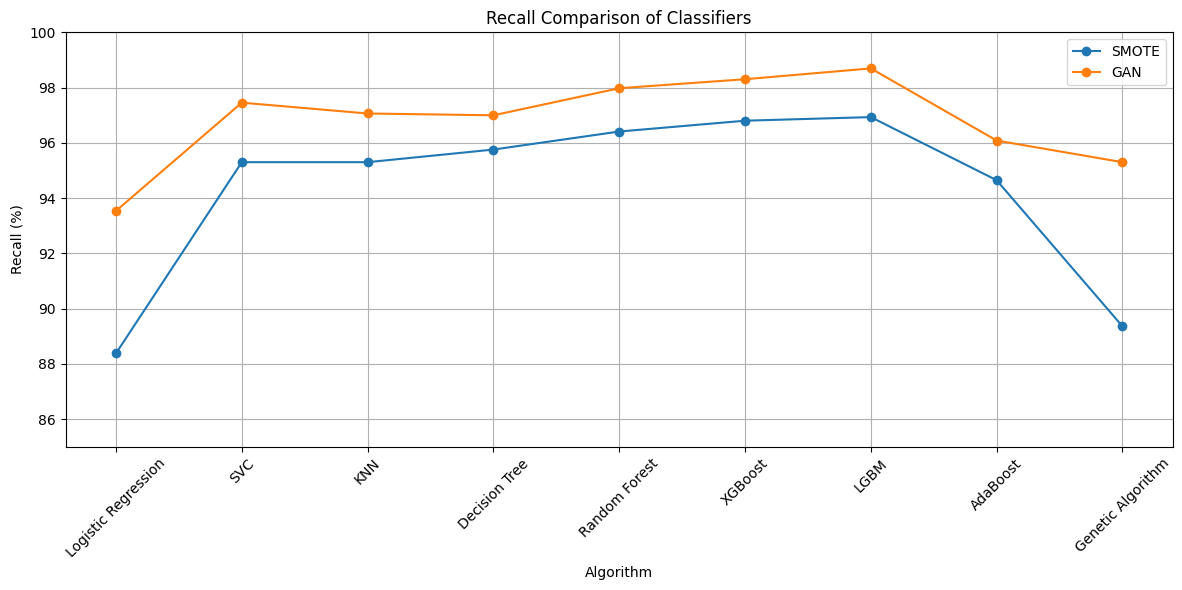

In [73]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(algorithms, smote_recall, marker='o', label='SMOTE')
plt.plot(algorithms, gan_recall, marker='o', label='GAN')

plt.title('Recall Comparison of Classifiers')
plt.xlabel('Algorithm')
plt.ylabel('Recall (%)')
plt.ylim(85, 100)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

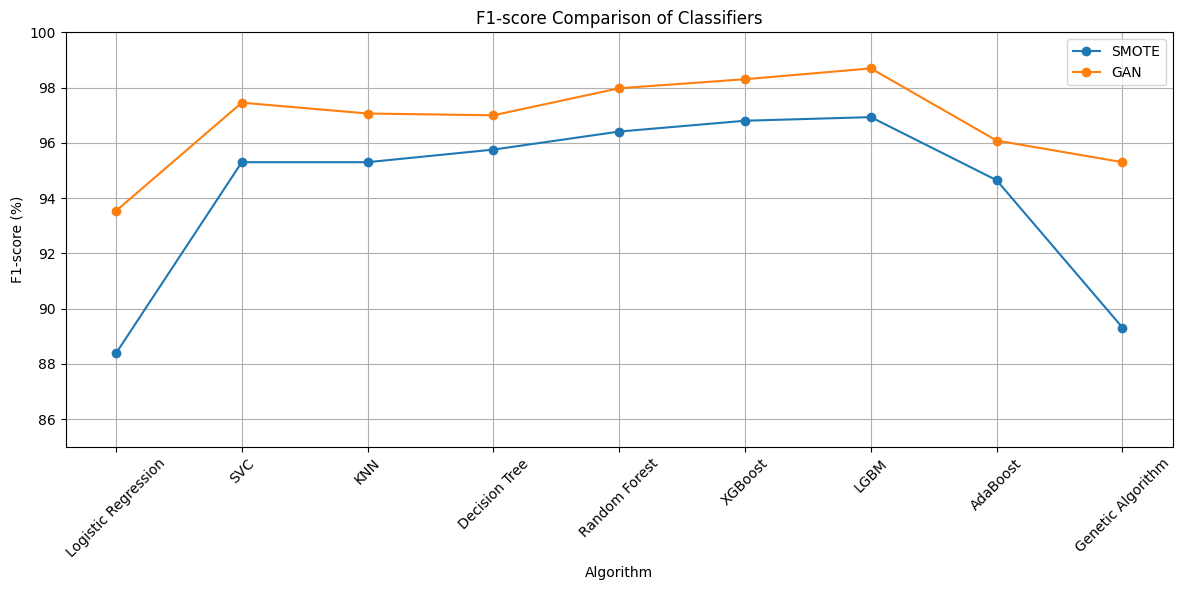

In [74]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(algorithms, smote_f1score, marker='o', label='SMOTE')
plt.plot(algorithms, gan_f1score, marker='o', label='GAN')

plt.title('F1-score Comparison of Classifiers')
plt.xlabel('Algorithm')
plt.ylabel('F1-score (%)')
plt.ylim(85, 100)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

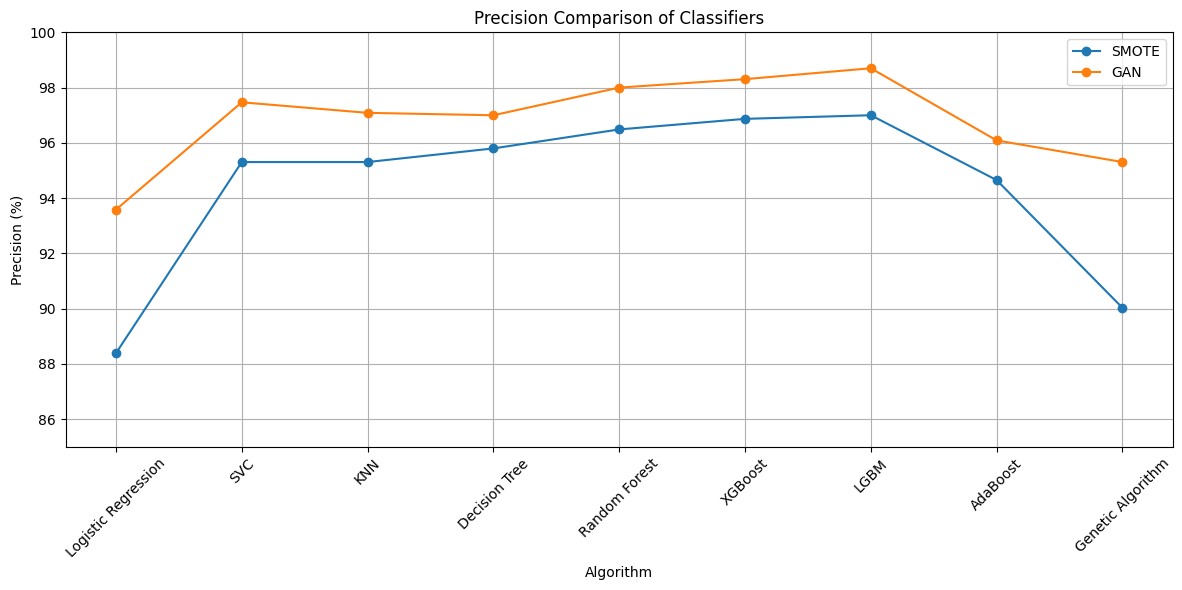

In [75]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(algorithms, smote_precision, marker='o', label='SMOTE')
plt.plot(algorithms, gan_precision, marker='o', label='GAN')

plt.title('Precision Comparison of Classifiers')
plt.xlabel('Algorithm')
plt.ylabel('Precision (%)')
plt.ylim(85, 100)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

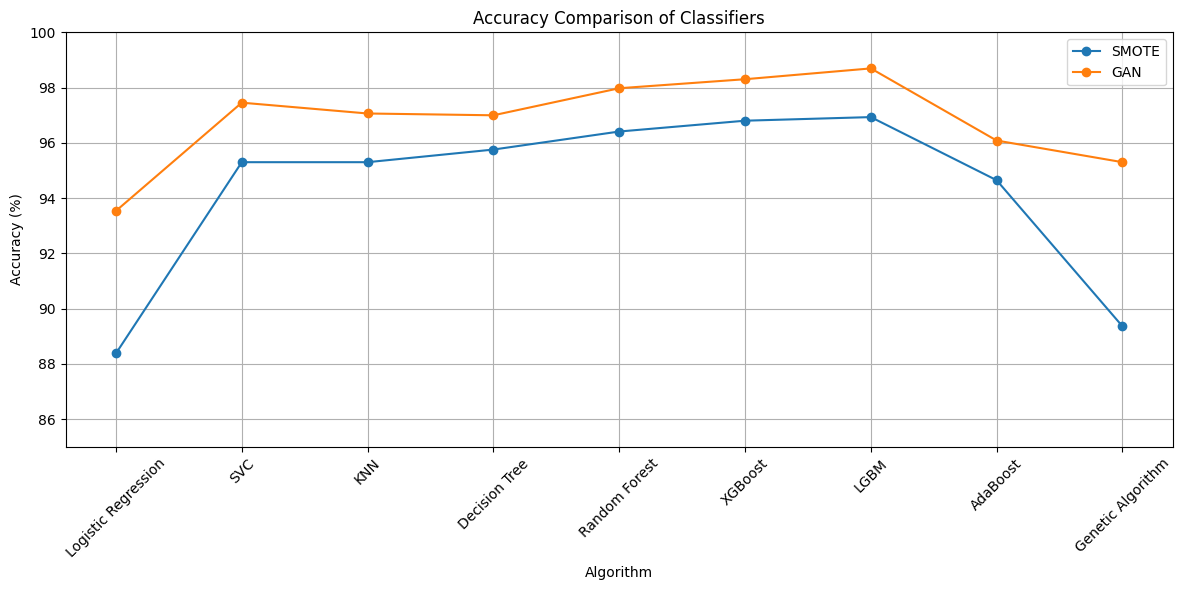

In [76]:
# Plotting the results
plt.figure(figsize=(12, 6))
algorithms = list(classifiers.keys())
plt.plot(algorithms, smote_accuracy, marker='o', label='SMOTE')
plt.plot(algorithms, gan_accuracy, marker='o', label='GAN')

# Adding titles and labels
plt.title('Accuracy Comparison of Classifiers')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.ylim(85, 100)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [78]:
# Create a DataFrame for the results
results_df = pd.DataFrame({
    'Algorithm': algorithms,
    'SMOTE Recall': smote_recall,
    'GAN Recall': gan_recall,
    'SMOTE F1-score': smote_f1score,
    'GAN F1-score': gan_f1score,
    'SMOTE Precision': smote_precision,
    'GAN Precision': gan_precision,
    'SMOTE Accuracy': smote_accuracy,
    'GAN Accuracy': gan_accuracy
})

# Display the table
print(results_df)

             Algorithm  SMOTE Recall  GAN Recall  SMOTE F1-score  \
0  Logistic Regression     88.381201   93.537859       88.380706   
1                  SVC     95.300261   97.454308       95.300133   
2                  KNN     95.300261   97.062663       95.300133   
3        Decision Tree     95.757180   96.997389       95.756224   
4        Random Forest     96.409922   97.976501       96.408451   
5              XGBoost     96.801567   98.302872       96.800420   
6                 LGBM     96.932115   98.694517       96.931015   
7             AdaBoost     94.647520   96.083551       94.647374   
8    Genetic Algorithm     89.360313   95.300261       89.315696   

   GAN F1-score  SMOTE Precision  GAN Precision  SMOTE Accuracy  GAN Accuracy  
0     93.536138        88.387743      93.584284       88.381201     93.537859  
1     97.454125        95.305203      97.467980       95.300261     97.454308  
2     97.062301        95.305203      97.085855       95.300261     97.062663  

It's clearly visible how GAN augmented dataset outperforms SMOTE balanced dataset in all the models.

The LGBM algorithm exhibited the most pronounced improvement, achieving a recall of 98.7% compared to SMOTE's 96.9% across all metrics.

# Model Testing

LGBM model is choosen out of all the off-the-shelf models and the GA-CS algorithm.

For the final testing, training and validation sets would be combined to form a comulative training set which would be tested on the preserved test set.

GridSearchCV would be used to find the best hyperparameter for the model.

In [79]:
# Combine training and validation sets
X_train_all = np.concatenate((X_train_balanced, X_val_balanced), axis=0)
y_train_all = np.concatenate((y_train_balanced, y_val_balanced), axis=0)

# Initialize and train the LGBM model
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train_all, y_train_all)

# Predict on the test set
y_pred_test = lgbm_model.predict(X_test)

# Evaluate performance on the test set
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))


[LightGBM] [Info] Number of positive: 6129, number of negative: 6129
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3915
[LightGBM] [Info] Number of data points in the train set: 12258, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1533
           1       0.98      0.94      0.96       436

    accuracy                           0.98      1969
   macro avg       0.98      0.97      0.97      1969
weighted avg       0.98      0.98      0.98      1969

[[1524    9]
 [  26  410]]


In [80]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'num_leaves': [31, 63, 127]
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=5, scoring='f1_macro', verbose=2)

# # Fit the grid search to the combined training and validation data
# grid_search.fit(X_train_all, y_train_all)

In [81]:
# Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'num_leaves': 31} to train the lgbm model

# Initialize and train the LGBM model with the best parameters
best_params = {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'num_leaves': 31}
lgbm_model_best = lgb.LGBMClassifier(**best_params)
lgbm_model_best.fit(X_train_all, y_train_all)

# Predict on the test set
y_pred_test_best = lgbm_model_best.predict(X_test)

# Evaluate performance on the test set
print(classification_report(y_test, y_pred_test_best))
print(confusion_matrix(y_test, y_pred_test_best))


[LightGBM] [Info] Number of positive: 6129, number of negative: 6129
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3915
[LightGBM] [Info] Number of data points in the train set: 12258, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

# Model Evaluation

## ROC

The ROC curve plots the True Positive Rate (TPR) against the
False Positive Rate (FPR) across various classification thresholds, providing a comprehensive measure of
a model's discriminatory power.



[LightGBM] [Info] Number of positive: 6129, number of negative: 6129
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3917
[LightGBM] [Info] Number of data points in the train set: 12258, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


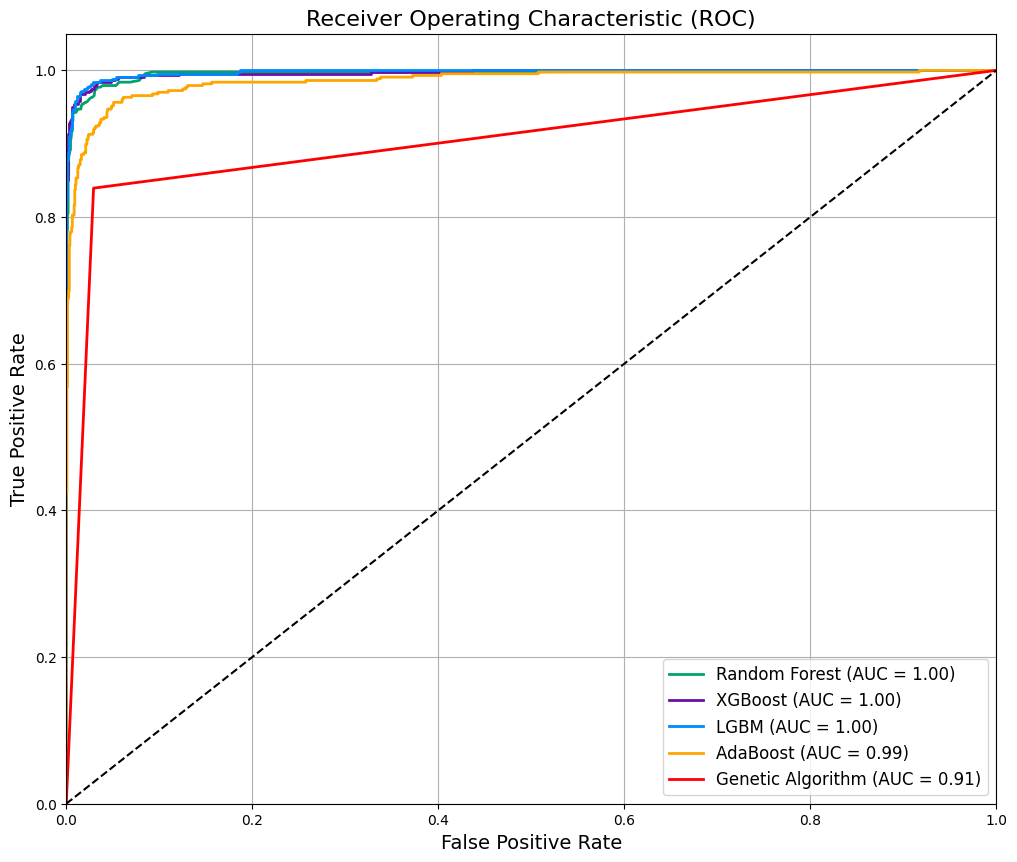

In [ ]:
primary_colors = {
    "LGBM": '#008BFB',                 # Blue
    'Genetic Algorithm': '#FF0000',    # Red
    "Random Forest": '#00A36C',        # Green
    "XGBoost": '#6A0DAD',              # Purple
    "AdaBoost": '#FFA500',             # Yellow
}

# Initialize lists for storing ROC data
fpr_list = []
tpr_list = []
roc_auc_list = []
classifiers_with_roc = []

# Iterate through classifiers
for name, clf in classifiers.items():
    if name not in primary_colors:
        continue

    if name != 'Genetic Algorithm':
        clf.fit(X_train_all, y_train_all)

    # Use predict for Keras Sequential model, predict_proba for others
    if isinstance(clf, Sequential):
        y_pred_proba = clf.predict(X_test)
    else:
        y_pred_proba = clf.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Store ROC curve data
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)
    classifiers_with_roc.append(name)  # Track which classifiers have ROC data

# Plot ROC curves
plt.figure(figsize=(12, 10))

# Plot ROC curves for each classifier in primary_colors
for i, name in enumerate(classifiers_with_roc):
    color = primary_colors.get(name, '#808080')
    plt.plot(fpr_list[i], tpr_list[i], color=color, lw=2, label=f'{name} (AUC = {roc_auc_list[i]:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

## Confusion Matrix (LGBM)

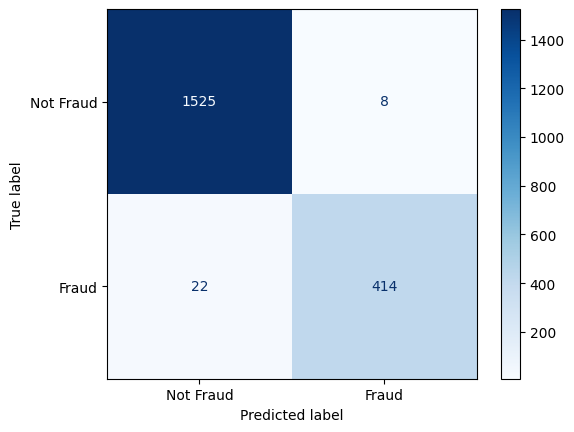

In [85]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test_best)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

The high recall, as shown by the 414 true positives and the minimal 10 false positive, demonstrates the model’s robustness in handling large and imbalanced datasets. Additionally, with only 22 false negatives, the LGBM model effectively reduces the risk of overlooking fraudulent activities.

## SHAP Analysis

In [ ]:
# Create a SHAP explainer
explainer = shap.Explainer(lgbm_model_best)
shap_values = explainer(X_test)

### Summary Plot

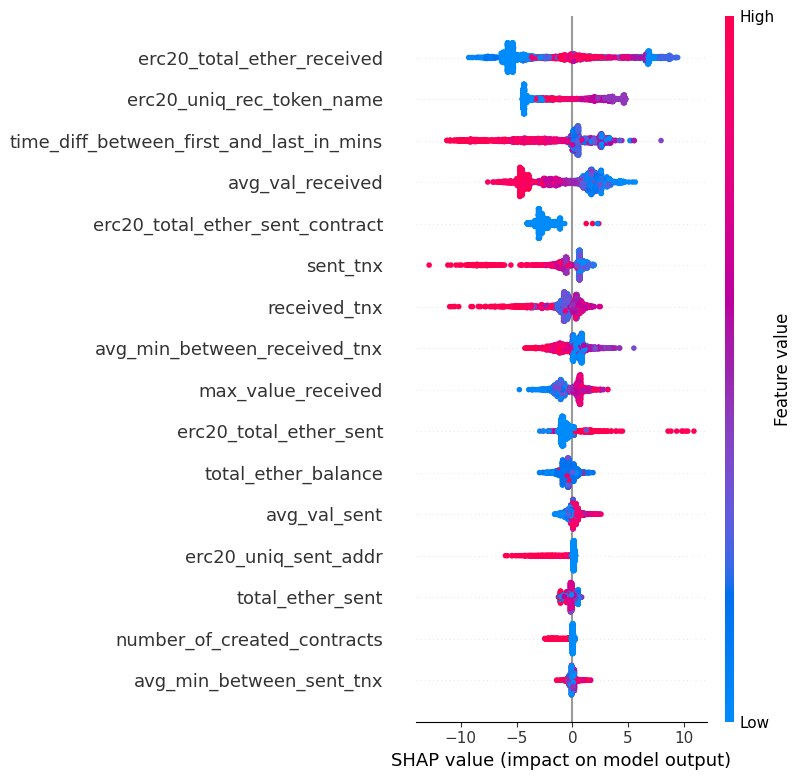

In [ ]:
# Plot the summary plot
shap.summary_plot(shap_values, X_test)

***erc20_total_ether_received*** emerged
as the most significant predictor of fraudulent behaviour.

### Dependency Plot

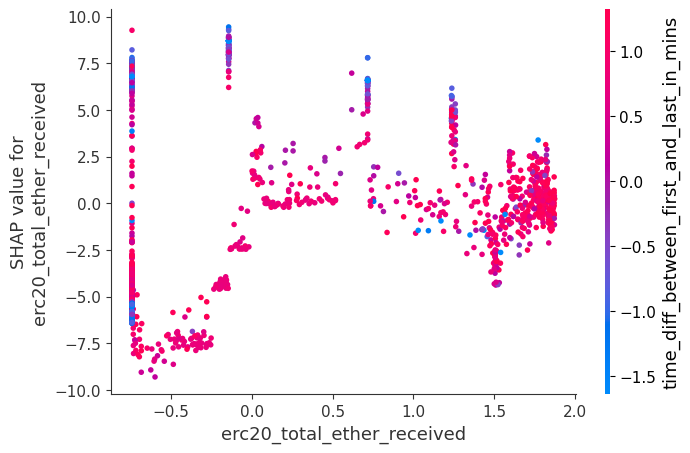

In [ ]:
# Dependency plot
shap.dependence_plot('erc20_total_ether_received', shap_values.values, X_test)

This feature, reveals a non-linear interaction where both extremely high and low ether receipts are associated with significant SHAP values. This dual association suggests a range of suspicious activities, from low volume "dusting" attacks to large-scale
laundering schemes

### Waterfall plot

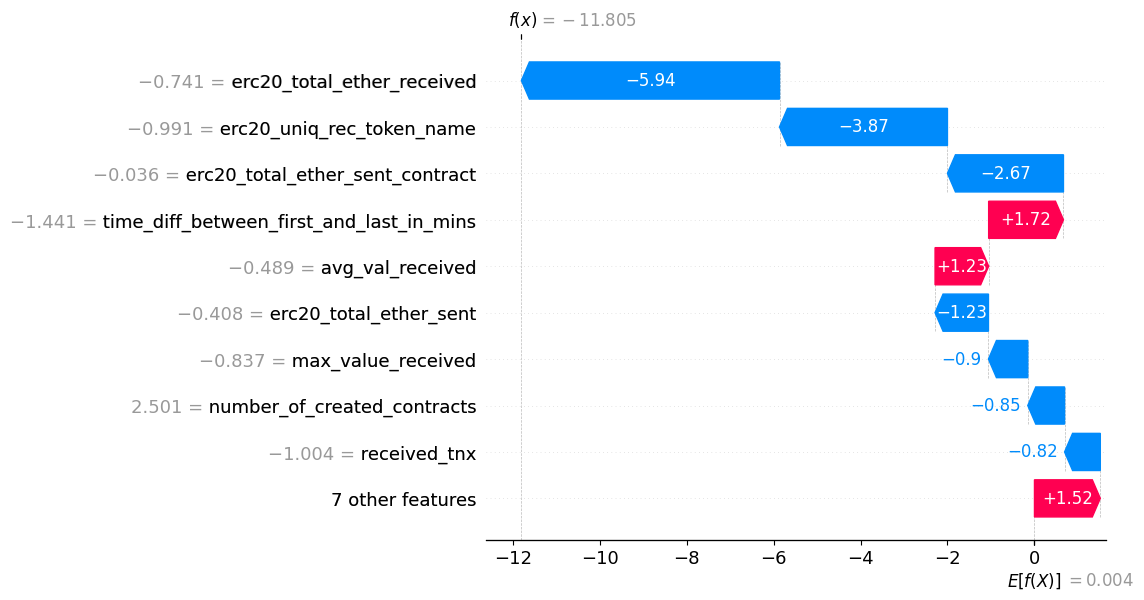

In [ ]:
# Waterfall plot
shap.plots.waterfall(shap_values[0])

***erc20_total_ether_receive*** and
***time_diff_between_first_and_last_in_mins*** displays a critical interaction, further emphasizing the role of transaction timing in uncovering coordinated fraudulent activities.

# Conclusion

This study significantly improved fraudulent transaction detection in the Ethereum blockchain by implementing a novel approach based on GANs.

The LGBM model achieved a remarkable recall rate of 98.56% and precision of 98.57%,
highlighting its superior capacity to detect fraud. This surpasses the current advanced technique, which,
while innovative, did not achieve the same level of precision and recall in this context.